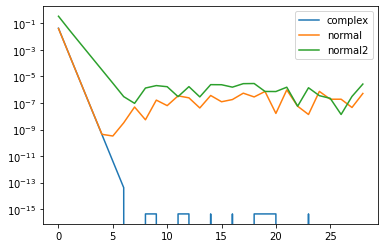

In [1]:
import sympy as sym
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

# 标准值
x = sym.Symbol('x')
y = sym.exp(x)/((sym.cos(x))**3 + (sym.sin(x))**3)
dy = y.diff(x)
f = sym.lambdify(x,y,'numpy')
df = sym.lambdify(x,dy,'numpy')

# 三种微分方案：复数，双边差分，单边差分
dfc = lambda x,h:np.imag(f(x+h*1j)/h)
dfn = lambda x,h:(f(x+h)-f(x-h))/(2*h)
dfn2 = lambda x,h:(f(x+h)-f(x))/(h)

# 三种微分方案精度对比

def feps(dfv):
    return lambda x,h:np.abs(dfv(x,h)-df(x))
s = np.arange(1,30)
hv = 1/10**s
eps_c = feps(dfc)(pi/4,hv)
eps_n = feps(dfn)(pi/4,hv)
eps_n2 = feps(dfn2)(pi/4,hv)


plt.plot(eps_c,label='complex')
plt.plot(eps_n,label='normal')
plt.plot(eps_n2,label='normal2')
plt.yscale('log')
plt.legend()
plt.show()